# Linear regression in scikit-learn
(Adapted from tutorial at https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Import some real data

In [12]:
X, y = datasets.load_diabetes(return_X_y=True)
X = X[:20,[2]]
y = y[:20]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train[:5,:]) # Show first five data points

(15, 1) (5, 1) (15,) (5,)
[[ 0.01211685]
 [-0.04716281]
 [-0.00189471]
 [-0.03638469]
 [ 0.04445121]]


# Fit linear regression model to data

In [13]:
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print('Coefficients', regr.coef_)
print('Intercept', regr.intercept_)

Coefficients [443.58293519]
Intercept 151.3857211551049


# Predict y for test (new) data points

In [15]:
y_pred_train = regr.predict(X_train)
y_pred_test = regr.predict(X_test)
print(y_pred_test.shape)
print(y_pred_test[:10])

(5,)
[146.72046963 128.55270598 143.37377633 178.75310553 114.20973469]


# MSE

In [16]:
# The mean squared error on the training set
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_pred_train))
# The coefficient of determination on the training set: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_pred_train))

Mean squared error: 3108.41
Coefficient of determination: 0.07


## A linear model is thus not a very good fit to this dataset. But let's carry on anyway.

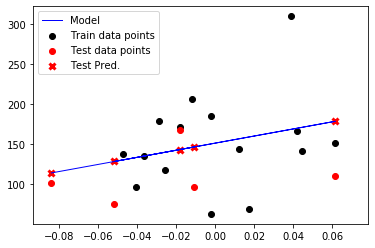

In [7]:
# Plot outputs
plt.scatter(X_train, y_train,  color='black', label='Train data points')
plt.scatter(X_test, y_test,  color='red', label='Test data points')
plt.plot(X_test, y_pred_test, color='blue', linewidth=1, label='Model')
plt.scatter(X_test, y_pred_test, marker='x', color='red', linewidth=3, label='Test Pred.')
plt.legend()
plt.show()

# Normalization

In [17]:
# Suppose we want to normalize the random variables and y values
mean_X = np.mean(X_train, axis=0)
std_X = np.std(X_train, axis=0)
mean_y = np.mean(y)
std_y = np.std(y)

X_train_norm = (X_train - mean_X) / std_X
y_train_norm = (y_train - mean_y) / std_y

Mean squared error: 13071.68
Coefficient of determination: -12.51


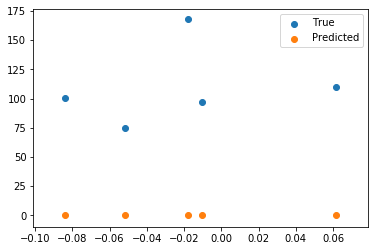

In [18]:
# Now train the model
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train_norm, y_train_norm)

# Predict on the test dataset
y_pred_test = regr.predict(X_test)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred_test))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred_test))

plt.scatter(X_test, y_test, label='True')
plt.scatter(X_test, y_pred_test, label='Predicted')
plt.legend()

## This looks really bad. Why?
## We need to account for the normalization in the prediction!

Mean squared error: 2169.59
Coefficient of determination: -1.24


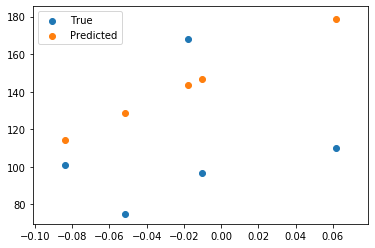

In [19]:
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train_norm, y_train_norm)

# Normalize the input just like we did the training data!
X_test_norm = (X_test - mean_X)/std_X

y_pred_test_norm = regr.predict(X_test_norm)

# Unnormalize y after prediction!
y_pred_test = (y_pred_test_norm * std_y) + mean_y

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred_test))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred_test))
plt.scatter(X_test, y_test, label='True')
plt.scatter(X_test, y_pred_test, label='Predicted')
plt.legend()

## Much better (though linear is still not a good model for the underlying relationship). Thus, when using normalization, make sure to handle it before fitting and at test time. Also, this can be handled via `scikit-learn` methods.